### Performance Issues (12 points)
You’re running an analysis job that you’ve run many times before on your favorite distributed big data platform (Spark, Hadoop, Presto, etc…). You notice that the job is taking far more time than it usually does.

What could have happened at the software or system level? List at least 3 possibilities, and the tools/strategies you’d use to determine if each is the cause.

1. The computing resources such as CPU and memory have been taken. One of the solutions I can check is resource utilization by using Linux System Monitor, resource management (vmstat, top) and Spark Resource Negotiator. In Yarn, we can monitor Spark task management on four different levels: application, job, stage, and task.
2. When the source data has been refreshed, and the data size is significantly larger than usual, we will observe the slowness, running some queries and analysis algorithms. The first thing we should check is the duplicates in the source data. Secondly, running analysis on the subset of data also helps reduce the running time.
3. The software or system might get updates or change the configurations. To confirm this issue, we can verify the recent updating log and version. The strategy to solve this issue is reaching out to the team members whether they have already solved the issue before. Alternatively, we are trying to search for the solution online and blogs.

### Statistical Certainty (15 points)

You have yearly medical costs for 200 patients in an experimental group and for 200 in a matched control group.

a)	Describe what you expect the distribution of yearly medical costs to look like.

Answer: I expect a right-skewed bell curve distribution because many people have lower PMPY, but only few people have high cost.

b)	How would you determine whether the experimental group has higher medical costs, including certainty?

Answer: apply the two-sample T test to calcuate the t-statistics and p-value. If p-value is less than 0.05, we can draw the conclusion from the test that we have 95% confident the medical costs from experimental group has higher medical costs.

c)	You also have access to 100 other features computed on these patients (weight, medication class, number of refills,... ) and have been asked by a client to determine which of these features differ between the two groups. How do you go about this task?

Answer: We can form the uultiple linear regression (MLR) that learns the relationship between those patients' characteristics, group factor (dummy variable), and medical costs. From the regression inference, we can analyze the coefficients of factors, p-value and confidence intervals to determine the significant features.

### Machine Learning (20 points)

You are trying to build a predictor for a rare disease from features computed on a large labeled population. There are 1K positive cases out of 100K patients and we have 400 features computed for each patient.

a)	What considerations go into building your prediction pipeline?

Answer: This is a traditional binary classification problem.

* Data Resource
* Baseline Model
* Evaluation Metrics
* Interpretable vs. Performance Accuracy
* Imbalanced data issue
* Large feature space
* Development Timeline
* Model Deployment

b)	Propose a specific pipeline (model and training/testing setup).

* Data preprocessing & Exploration
    * Combine, clean and manipulate various data source
    * Imputing missing data
    * Exploratory Analysis: patient segmentation, clinical cohorts
    * Dimension reduction: correlation analysis, domain knowledge, PCA, t-SNE, clustering
* Data Splitting
    * Training, validation, testing sets
    * Class proportion validation
* Feature Engineering
    * Categorical variable encoding
    * Numerical variable scaling: standardization, normalization
    * Clinical Code: NLP techniques to extract DX, CPT, Drug code info
* Model Training & Evaluation
    * Log regression, random-forest, XGBoost, Neural Network (based on business goals, client needs, timeline)
    * Training, tuning hyper-parameters
    * Monitoring model performance: overfitting
    * Feature Selection: LASSO, recursive feature selection (RFE)

c)	How would you report the results of your predictive algorithm to a clinical researcher?

* Deliver Insights & Predictions
    * Baseline Performance: literature research, ground true
    * Performance Metrics: precision, recall, F1, AUC-ROC
    * Feature Importance: driving factors
    * Prediction: binary output, probability of being a disease as a risk score
    * Demo Example: give two patients with their profiles, working through the math formula or decision tree path

### Freedom Exploration

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('TABLE_III._Deaths_in_122_U.S._cities.csv')
df.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


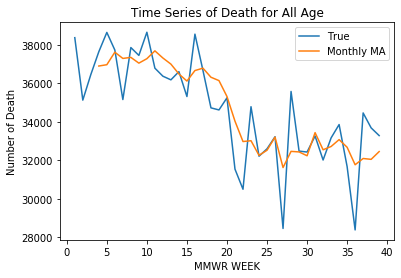

In [29]:
temp = df.groupby('MMWR WEEK')['All causes, by age (years), All Ages**'].sum()
temp.plot(label='True')
temp.rolling(window=4).mean().plot(label='Monthly MA')
plt.ylabel('Number of Death')
plt.title('Time Series of Death for All Age')
plt.legend()
plt.show()

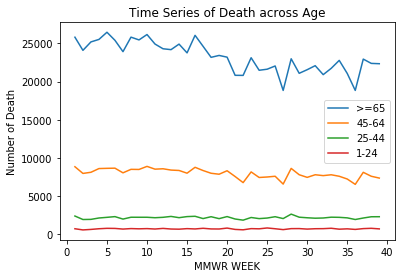

In [78]:
temp = df.iloc[:,[2,5,7,9,11]].groupby('MMWR WEEK').sum()
temp.columns = ['>=65', '45-64', '25-44', '1-24']

temp.plot()
plt.ylabel('Number of Death')
plt.title('Time Series of Death across Age')
plt.show()

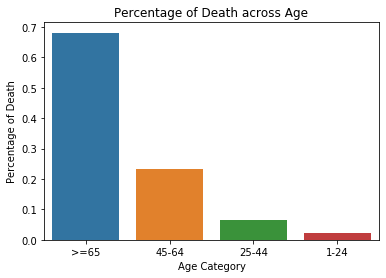

In [70]:
temp = df.iloc[:,[5,7,9,11]].sum().reset_index()
temp['index'] = ['>=65', '45-64', '25-44', '1-24']
temp.columns = ['Age Category', 'Death']
temp['Perc'] = temp.Death / temp.Death.sum()

sns.barplot(x='Age Category', y='Perc', data=temp)
plt.ylabel('Percentage of Death')
plt.title('Percentage of Death across Age')
plt.show()

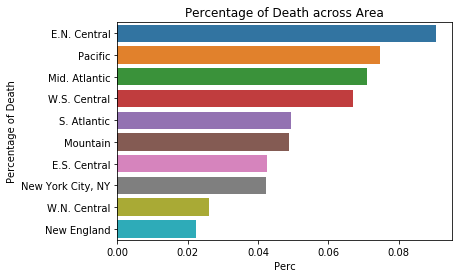

In [71]:
temp = df.query('`Reporting Area` != "Total_"').groupby('Reporting Area')['All causes, by age (years), All Ages**'].sum().reset_index()
temp.columns = ['Area', 'Death']
temp['Perc'] = temp.Death / temp.Death.sum()
temp = temp.sort_values('Perc', ascending=False).head(10)

sns.barplot(x='Perc', y='Area', data=temp)
plt.ylabel('Percentage of Death')
plt.title('Percentage of Death across Area')
plt.show()

Hi Luca,

From analyzing the total number of deaths in 2016 in which the cause of death was pneumonia or influenza across various cities, I have three interesting insights I would like to share with you.

1. From 39-week death records, I found the total number of deaths started at 38k, but was decreasing at week 18, and eventually got stable around 32k, about 16% reduction. More importantly, the senior group (>=65) had obviously decreased, so it might be one of the reasons leading to the overall death reduction.
2. Across different age categories, I found about 70% death was from the senior group (>=65), 24% from the group (45-64), and rarely happened in the young group (1-24).
3. Across various reporting areas, the largest death proportion in 39 weeks was from E.N. Central about 9%. The plot above is showing the top 10 death areas from the analysis.

I have attached the excel books below for your reference, which contains the results in detail for my analysis. Please let me know any other interesting points you would like to dig into more.

Best regards,

Jay

### Time Series Exploration (25 points)

1. Plot the distribution of “event counts” for all users who are male and ≥30 years old. An “event count” is defined as the number of observed events for a given user.

2. Suppose you are interested in understanding how long the gap is between observed events across users. Compute the “inter-event interval” for all events (defined as the difference in time between two sequential events associated with the same user). Once you have computed these intervals, plot the distribution of these intervals. Note: Certain users may contribute more inter-event intervals to the distribution than others- this is okay.


In [106]:
user = pd.read_csv('timeseries_users.csv')
event = pd.read_csv('timeseries_events.csv')

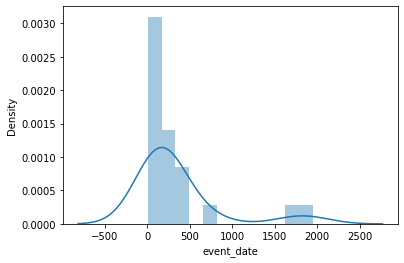

In [103]:
event_count = event.groupby('user_id').count().reset_index()
temp = pd.merge(user, event_count, left_on = 'user_id', right_on = 'user_id', how = 'left')

sns.distplot(temp.query('age >= 30 and gender == "m"').event_date)
plt.show()

In [109]:
event['event_date'] = pd.to_datetime(event.event_date)
event.head()

,user_id,event_date
0,0,2015-02-26
1,0,2015-03-10
2,0,2015-03-30
3,0,2015-02-15
4,0,2015-02-18


### Observational Studies (15 points)

We have a dataset of patients for which we have medical data (e.g., what conditions they have been diagnosed with, what medication they are on) and lifestyle (e.g., whether they are using a tracker and which one, how many steps they take per day, etc.) 
We’re running a regression model to find variables correlated with two different treatments, A and B, on a diabetic cohort over the last 4 years.  The model surfaces an unexpected result: Apple Watch users are statistically much more likely (than users of other wearable sensors) to use treatment A than B. 

What next steps would you take before drawing any conclusions on the nature of the association discovered? 


1. Validating the sample size between Apple watch users and other users
2. Checking the feature colinearity between Apple watch users and treatment A
3. Running time series analysis on treatment A and B across Apple Watch users to validate the difference appears in all four years, or only recently.
4. Segmenting patients by demographic info such as age, gender and locations to validate whether the difference only occur in one or some certain groups. 